<a href="https://colab.research.google.com/github/satyamkumarsengar/Online-Retail-Customer-Segmentation-Unsupervised-ML/blob/main/Satyam__Online_Retail_Customer_Segmentation_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Online Retail Customer Segmentation Unsupervised ML



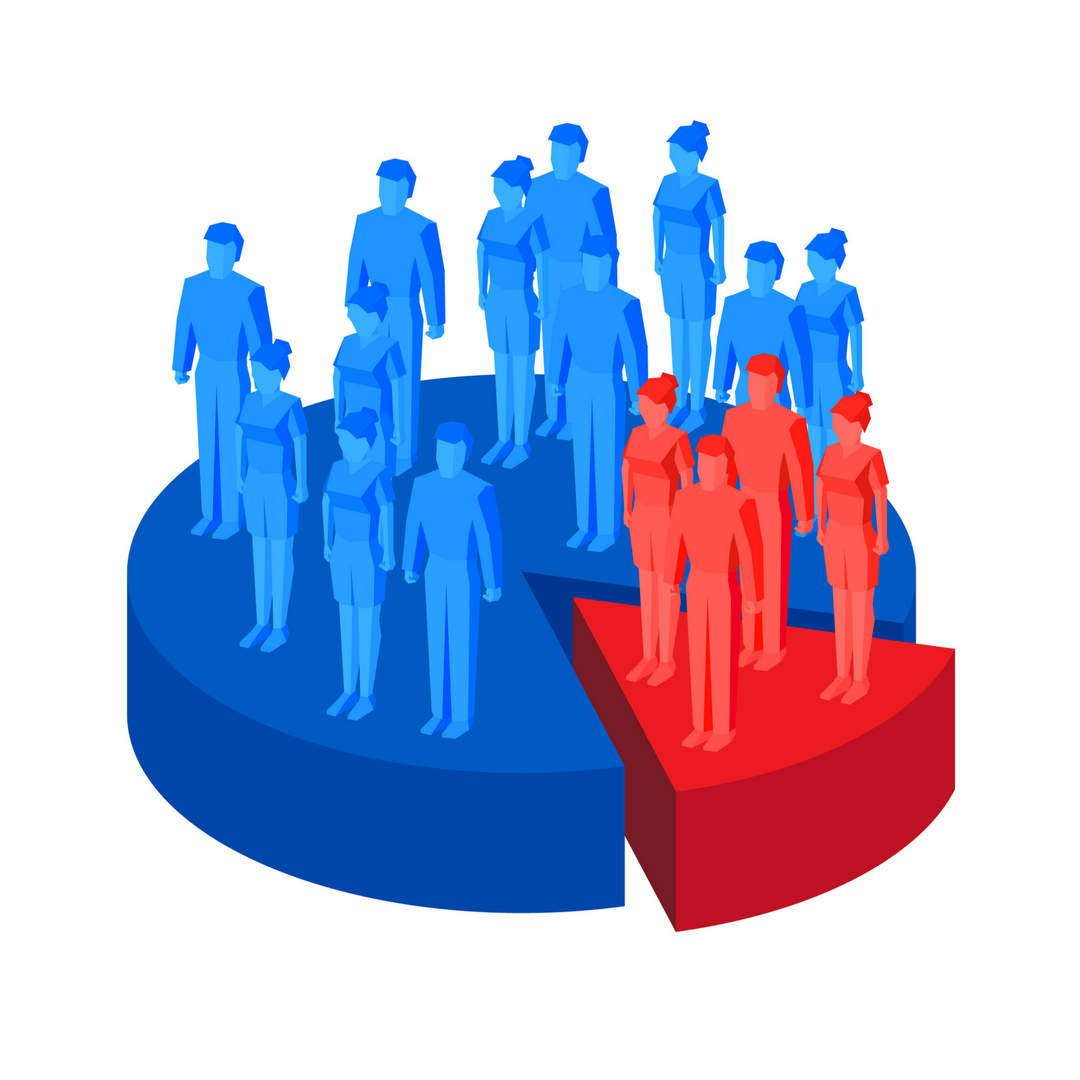

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

In this project, our objective is to analyze a transnational dataset that encompasses all the transactions conducted between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail company. This company specializes in selling distinctive, all-occasion gifts. It's important to note that a substantial portion of the company's customer base consists of wholesale buyers. Our primary goal is to identify significant customer segments within this dataset, which can help the company better understand its customer base and tailor its strategies accordingly.

# **GitHub Link -**


# **Problem Statement**


* A fundamental objective for every business is to gain a deep understanding of their specific customer base.
* This involves examining how consumers interact with and utilize the company's services.
* It's important to recognize that each consumer may have their unique way of engaging with the company's offerings.
* The challenge at hand is to delineate the distinct consumer profiles of this delivery company.
* We aim to identify and characterize the various behaviors and approaches that these consumers employ when utilizing the company's services.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')

### Dataset Loading

### Dataset First look

In [ ]:
# Dataset First five row look from upper
df.head()

### Dataset Rows & Columns count

In [ ]:
df.shape

### Dataset Information

In [ ]:
df.info()

#### Duplicate Values

In [ ]:
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

###  About dataset:-

* In our data set there are some duplicate values present.
* some missing values present.

## ***2. Understanding Your Variables***

### Data Wrangling Code

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

In [ ]:
# Dropping Duplicate Rows
df=df.drop_duplicates()
len(df[df.duplicated()])

In [ ]:
# after removing duplicates checking data shape
df.shape

In [ ]:
# we have to drop some InvoiceNo which are starts with 'C' because 'C' indicates a cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df[df['InvoiceNo'].str.contains('C')]

In [ ]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# after droping cancelled products, the data shape
df.shape

In [ ]:
# seeing all columns
df.columns

In [ ]:
# convert invoice Data column into 'year','month','day','hour','minute','second'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day
df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
df['InvoiceDate_second'] = df['InvoiceDate'].dt.second

In [ ]:
# checking all columns and data types
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

### What all manipulations have I done and insights I found?

* There was some duplicate values so i removed those values.
* I dropped InvoiceNo column which are starts with 'c' because 'c', it indicates a cancellation.
* I converted invoice Data column into 'year','month','day','hour','minute','second'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- **Bar plot between customer_id corresponding to their count**

In [ ]:
# Chart - 1 visualization code
# I have a certain amount of rows. Let us check if each row has a single customer or not. If not than how many customer ids I have.

# let me see the unique ids of customers
print('The no. of customers = ',df['CustomerID'].nunique())

In [ ]:
# So I have around 392732 rows but only 4339 customers. Let me now see who is most active customer.

# finding most active customer
active_customers=pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers


In [ ]:
# top 5
active_customers.head()

In [ ]:
# visualizing bar chat of top 5 customers
plt.figure(figsize=(9,8))
plt.title('Top 5 active customers ID')
sns.barplot(x='CustomerID',y='Count',data=active_customers[:5])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* The top 5 most active customers that have been regularly purchasing are having ids 17841, 14911, 14096, 12748, 14606.
* These customers can be considered as special customeres because it is very likely that they would buy more often.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Positive business growth:
* we can identify most active customer and company can focus on those customers.
* If company can focus its efforts on nurturing and retaining these customers due to this repeat purchase increases so revenue increases.

#### Chart - 2- **Bar Plot for top 5 product**

In [ ]:
# Chart - 2 visualization code

# Analysis of Categorical Features

categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

In [ ]:
# Analysis of Description Variable

Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [ ]:
Description_df.head()

In [ ]:
Description_df.tail()

In [ ]:
plt.figure(figsize=(9,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?


Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product almost 2018 units were sold.
* REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Insights which will create positive business impact:
* The high counts of these top products suggest a strong demand or popularity among customers.
* This information can be utilized to ensure adequate stock availability, plan targeted promotions,so due to this product sells increases and revenue increases.

#### Chart - 3- **Bar plot to show Bottom 5 product name**

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* Bar chart draw variables in one axis and corresponding values in another axis.
* Here i want to know counts of different product thats why i used bar plot.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* It has been observed that "TINY CRYSTAL BRACELET RED," "4 GOLD FLOCK CHRISTMAS BALLS," "ZINC STAR T-LIGHT HOLDER," "BLUE GINGHAM ROSE CUSHION COVER," and "PAPER CRAFT, LITTLE BIRDIE," have very low counts, indicating a limited demand or popularity among customers.

#### Chart - 4-**Bar plot between top 5 stockname corresponding to their count**

In [ ]:
# Chart - 4 visualization code
# Analysis of StockCode Variable
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)

In [ ]:
StockCode_df.head()

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* StockCode-85123Ais the first highest selling product.
* StockCode-22423 is the 2nd highest selling product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Insights helps to create positive business growth:
 * By analyzing demand for these top stock codes, the company can make data-driven decisions regarding procurement, production, and restocking.
 * This can help optimize sales, reduce excess inventory, and improve overall revenue and profitability.
 * By ensuring the availability of popular stock codes, the company can meet customer demand and enhance customer satisfaction.

#### Chart - 5-**Bar plot between top 5 Bottom stockname corresponding to their count**

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(9,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* These stock codes, represented by the bottom 5 names, have the least occurrence among all the stock codes.
* The low counts of these bottom stock codes suggest a limited demand or popularity among customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
It has been observed that gained insights help to create positive business impact:
* By identifying the least popular stock codes, the company can optimize its inventory management.and instead of these product company focuses on high demand product so reveue increases.

#### Chart - 6-**Bar plot to show Top 5 Country based on the Most Numbers Customers**

In [ ]:
# Chart - 6 visualization code
# Analysis of country Variable

country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

In [ ]:
country_df.head()

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is the best option.
* For doing comparision on categorical variables Bar chart is the best.
* Here we draw in different countries average no of customer thats why used bar chart.


##### 2. What is/are the insight(s) found from the chart?

Ans :-
* It has been observed that UK has highest number of customers.
* Germany,France and IreLand has almost equal number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
We have to take some decision on the basis of insights which we found from the chart.so we can create positive impact on business.
*  By identifying the countries with the highest number of customers, the company can focus its marketing efforts and allocate resources to these countries.
* This can result in targeted marketing campaigns, improved customer engagement, and increased sales in these key markets.

#### Chart - 7-**Bar plot to show Top 5 Country based least Numbers of  Customers**

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(8,7))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.
* Here we draw average no of customer in different countries from the bottom.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* There are very less customers from Saudi Arabia.
* Bahrain is the 2nd Country having least number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
The insights gained from understanding the challenges or barriers in certain countries can guide the company in developing targeted strategies to penetrate these markets. By addressing the specific challenges and adapting the business approach accordingly, the company can overcome barriers, attract more customers, and achieve business growth.

#### Chart - 8-**Plot histogram for each numerical columns to check data distribution**

In [ ]:
# Chart - 8 visualization code

# Analysis Numeric Features

numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

In [ ]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

##### 1. Why did I pick the specific chart?

Ans :-
* histogram is a suitable choice for visualizing the distribution of numerical data.
*  Histograms allow us to visualize how the data is distributed across different ranges or bins.
* It provides insights into the frequency or count of data points within each bin, giving a sense of the data's distribution pattern.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* It has been observed that some of the data are almost normally distributed.
* some are positively distributed and some are highly positively distributed.
* some are negatively distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Gained insights help to create positive business impact:
* By understanding the distribution of data it help to taking decision-making and improved strategies in various business areas, such as marketing, sales, and operations.
* By detecting and addressing outliers, businesses can improve data quality, enhance decision-making accuracy.

#### Chart - 9-**Plot boxplot on each numerical columns to check outliers**

In [ ]:
# Chart - 9 visualization code

# plot a boxplot for the label by each numerical feature

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(col)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Churn")
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* box plots provide a concise and informative visualization of the distribution, spread, outliers, and skewness of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* Most of the columns are not containing outliers.
* But some columns contain outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Yes with the help of insight which i found from this will help to create business growth.
* The identification of outliers in the data through boxplots can help businesses to identify and address data quality issues.
* By detecting and addressing outliers, businesses can improve the accuracy and reliability of their data, leading to better decision-making and improved business performance.

#### Chart - 10 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did I pick the specific chart?

Ans :-
* I want to see the correlation between all the columns in one go.
* Heat map will give the correlation between columns in a single chart, for this reason i used heatmap.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* There is positive correlation between InvoiceDate_day and InvoiceDate_month.

* There is positive correlation between InvoiceDate_minute and InvoiceDate_hour.

* Positive correlation between InvoiceDate_hour and InvoiceDate_month.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The means of invoices across different months are equal.
2.The mean quantity is equal to a specified value.
3. The mean unit price is equal to a specified value.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The means of invoices across different months are equal.

Alternative hypothesis (H1): At least one of the means of invoices across different months is different.

Test Type: one-way ANOVA test.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Extract the "InvoiceDate_Month" column
invoice_months = df['InvoiceDate_month']

# Prepare the data for the one-way ANOVA test
groups = [df[df['InvoiceDate_month'] == month]['InvoiceDate_month'] for month in invoice_months.unique()]

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(*groups)


# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject null hypothesis. At least one of the means of invoices across different months is different.")
else:
    print("Fail to reject null hypothesis. The means of invoices across different months are equal.")

##### Which statistical test have you done to obtain P-Value?

Ans :-
I used F- statistic.The F-statistic test is commonly used in statistical analysis, specifically in analysis of variance (ANOVA) tests. ANOVA is used to compare the means of two or more groups to determine if there are any significant differences between them. The F-statistic is the test statistic used in ANOVA to assess the variation between group means and the variation within groups.

##### Why did you choose the specific statistical test?

Here data is approximately normally distributed.thats why i used F-statistic test

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The mean quantity is equal to a specified value.

Alternative hypothesis (H1): The mean quantity is not equal to the specified value.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Extract the "Quantity" column
quantity = df['Quantity']

# Specify the value to test against
specified_value = 100  # For example, testing against a mean quantity of 10

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(quantity, specified_value)


# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject null hypothesis. The mean quantity is significantly different from the specified value.")
else:
    print("Fail to reject null hypothesis. The mean quantity is not significantly different from the specified value.")

##### Which statistical test have you done to obtain P-Value?

I have used t-Test as the statistical testing to obtain P-Value and

---

found the result that Null hypothesis has been rejected and the mean quantity is significantly different from the specified value.

##### Why did you choose the specific statistical test?

* data is not normally distributed and for skewed data t test is best option.

### Hypothetical Statement - 3


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The mean unit price is equal to a specified value.

Alternative hypothesis (H1): The mean unit price is not equal to the specified value.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Extract the "UnitPrice" column
unit_price = df['UnitPrice']

# Specify the value to test against
specified_value = 110  # For example, testing against a mean unit price of 10

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(unit_price, specified_value)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject null hypothesis. The mean unit price is significantly different from the specified value.")
else:
    print("Fail to reject null hypothesis. The mean unit price is not significantly different from the specified value.")

##### Which statistical test have you done to obtain P-Value?

I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and the mean unit price is significantly different from the specified value.

##### Why did you choose the specific statistical test?

* Our data distribution is postively skewed.
* So, for a skewed data we can use T-test for better result. Thus, I used t - test.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

In [ ]:
df['Description'].isnull().sum()

In [ ]:
df['CustomerID'].isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

#### What all missing value imputation techniques have you used and why did you use those techniques?

Here i simply removed rows where missing values was there.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# plot a boxplot for the label by each numerical feature

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Outliers in 'Quantity' and 'UnitPrice' can provide valuable insights into customer behavior, preferences, and purchasing patterns. Outliers may represent high-value transactions, bulk purchases, or unique buying behaviors that are essential to understand for effective customer segmentation. Removing outliers may lead to the loss of such valuable information.
* So i kept outliers instead of removing.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Create a new features Day from Invoicedate

df['Day']=df['InvoiceDate'].dt.day_name()

In [ ]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [ ]:

df.head()

In [ ]:
# Lets check distribution of TotalAmount column which i have created:
plt.figure(figsize=(8,7))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'])

In [ ]:
df['TotalAmount'].describe()

In [ ]:
# lets create dataframe of Day column:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

In [ ]:
# draw bar chart of dataframe which i created:
plt.figure(figsize=(11,6))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

**Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [ ]:
# lets create dataframe of InvoiceDate_month column:
month_df=df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'InvoiceDate_month': 'Count'}, inplace=True)
month_df

In [ ]:
# create bar chart of dataframe which i created:
plt.figure(figsize=(11,6))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

**most numbers of customers have purches the gifts in the month of November ,October and December September.**

**less numbers of customers have purches the gifts in the month of April ,january and February**

In [ ]:
# create dataframe of InvoiceDate_hour column:
hour_df=df['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

In [ ]:
# create bar chart of dataframe which i created:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

**From this graph we can see that in AfterNone Time most of the customers have purches the item.**

In [ ]:
# create function to divide time into 3 category:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df['Time_type']=df['InvoiceDate_hour'].apply(time_type)

In [ ]:
plt.figure(figsize=(9,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)
plt.show()

**Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening**

##**Creating RFM model**

Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.

RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.

* Recency = Latest Date - Last Inovice Data,

* Frequency = count of invoice no. of transaction(s),

* Monetary = Sum of Total Amount for each customer

In [ ]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

### 5. Data Transformation

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

In [ ]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,5))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,5))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,5))
sns.distplot(x)

In [ ]:
# Handle negative and zero values to avoid issues during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

# Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df['Monetary']]

# Perform Log transformation to bring data into normal or near-normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

# Calculate quantiles on the transformed data
quantiles = Log_Tfd_Data.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Define scoring functions for R, F, and M segments on transformed data
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Calculate R, F, and M segment values on the transformed data
rfm_df['R'] = Log_Tfd_Data['Recency'].apply(RScoring, args=('Recency', quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency', quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary', quantiles,))

# Calculate and add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# Calculate and add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

rfm_df.head()

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(9,8))
sns.distplot(Recency_Plot)

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(9,8))
sns.distplot(Frequency_Plot)

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(9,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes some of the data are positively skewed so we need to convert into normally distributed,for that reason i used here log transformation.

### 6. Data Scaling

In [ ]:
# Scaling your data

# lets scale on Recency and Monetary
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

##### Which method have you used to scale you data and why?

* Here StandardScaler method is used to scale the data.
* It transforms the data so that it has a mean of 0 and a standard deviation of 1.
* There are some outliers are present in our dataset so Standardization is robust to outliers.
* when outliers are present do not have a significant impact on the scaling process so thats why i used this one.

### 8. Data Splitting

In [ ]:
# Calculate quantiles on the transformed data
quantiles = rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']].quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Define scoring functions for R, F, and M segments on transformed data
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Calculate R, F, and M segment values on the transformed data
rfm_df['R'] = rfm_df['Recency_log'].apply(RScoring, args=('Recency_log', quantiles,))
rfm_df['F'] = rfm_df['Frequency_log'].apply(FnMScoring, args=('Frequency_log', quantiles,))
rfm_df['M'] = rfm_df['Monetary_log'].apply(FnMScoring, args=('Monetary_log', quantiles,))

# Calculate and add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# Calculate and add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

rfm_df.head()

## ***7. ML Model Implementation***

### ML Model - 1- **K-Means Clustering**

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minimum number of clusters required by using Silhouette Score and Elbow method.

###**Applying Silhouette Score Method on Recency and Monetary**

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

### **Applying elbow method**

***Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. Let us see how this elbow method works. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance***.

***When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease***.

***Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k***.

###**Applying Elbow Method on Recency and Monetary**


In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_


In [ ]:
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* So giving n_clusters=2 on Kmeans Model.

In [ ]:
# ML Model - 1 Implementation

kmeans = KMeans(n_clusters=2)

# Fit the Algorithm

kmeans.fit(X)

# Predict on the model
y_kmeans= kmeans.predict(X)


In [ ]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(9,7))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Recency and Monetary**


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here i applied K means Clustering to cluster the customers based on the given features. We used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 2 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels.

####2. Explain business impact of the ML model used.

K means clustering can be useful in customer segmentation based on demographic, psychographic and behavioural data as well as performance data to cluster the consumers for a particular product category. This can be eventually useful in making business strategies for different categories of customers and retain them for further growth of business.

### ML Model - 2- **DBSCAN Algorithm on Recency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(9,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

* **we see that ,Customers are well separate when we cluster them by Recency and Monetary**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* The ML model used is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is an unsupervised learning algorithm that groups data points based on their density and proximity to each other. It is particularly useful for discovering clusters of arbitrary shapes and handling data with varying densities.

###**Applying silhouette Score  Method on Frquency and Monetary**

In [ ]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

###**Applying Elbow Method on Frequency and Monetary**


In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(9,8))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

###**Applying DBSCAN to Method on Frequency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(9,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

In [ ]:
plt.figure(figsize=(9,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

###**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(9,8))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)
plt.show()

* **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**

###**Applying Elbow Method on Recency ,Frequency and Monetary**

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

### ML Model - 3-**Hierarchical Clustering**

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line).

###**Dendogram to find the optimal number of clusters**

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(9,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

* **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**
* **No. of Cluster = 2**

In [ ]:
# ML Model - 3 Implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

# Fit the Algorithm
y_hc = hc.fit_predict(X)


In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(9,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

* **By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Agglomerative Clustering. Agglomerative Clustering is a hierarchical clustering algorithm that starts with each data point as an individual cluster and iteratively merges the clusters based on a specified linkage criterion. In this case, the "ward" linkage criterion is used, which minimizes the variance within each cluster.

###**Applying DBSCAN to Recency ,Frequency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(9,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The optimal number of clusters for most of the models and data combinations is 2. The evaluation metrics considered in our project are silhouette score and the elbow method for K-means clustering.

To evaluate the positive business impact of the customer segmentation,the following evaluation metrics were considered:

Silhouette Score: The silhouette score measures the quality and compactness of the clusters. A higher silhouette score indicates well-separated clusters with minimal overlap. It provides a measure of how similar an object is to its own cluster compared to other clusters. Considering the silhouette score helps ensure that the identified clusters are distinct and meaningful, which can be beneficial for targeting specific customer segments with tailored marketing strategies.

Elbow Method: The elbow method is used to determine the optimal number of clusters based on the within-cluster sum of squares (WCSS) or the distortion. It involves plotting the WCSS as a function of the number of clusters and identifying the "elbow" point where the improvement in WCSS diminishes. The chosen number of clusters at the elbow point represents a trade-off between maximizing the separation of clusters and minimizing the complexity of the segmentation. This helps in finding a balance between granularity and practicality for business implementation.

The selection of these evaluation metrics indicates a focus on the quality of the clusters, their distinctiveness, and the ability to interpret and act upon the segmentation results. By considering these metrics, you aim to create customer segments that have clear boundaries and exhibit different behaviors or characteristics, which can lead to positive business impact through targeted marketing strategies, personalized customer experiences, and improved customer satisfaction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* Here i used K-means clustering.
* K-means clustering is a popular and widely used algorithm for customer segmentation due to its simplicity, interpretability, and scalability.

Why i used,because-:
* Scalability: K-means clustering is computationally efficient and can handle large datasets with a large number of customers. This is particularly important for online businesses that often have a vast amount of customer data.
* Interpretability: K-means clustering produces easily interpretable results. The algorithm assigns each customer to a specific cluster based on their similarity in terms of feature values. The resulting clusters can be easily understood and analyzed to gain insights into customer behavior and characteristics.
* Applicability to Online Data: K-means clustering can handle various types of features, including demographic information, purchase behavior, browsing patterns, or any other relevant data collected from online platforms. It can capture different aspects of customer behavior and group customers into distinct segments based on their similarities.

## ***8.*** ***Future Work (Optional)***

###  Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

# Assuming your best performing model is stored in the variable 'best_model'
# Save the model to a pickle file
with open('kmeans .pkl', 'wb') as f:
    pickle.dump(kmeans, f)


# **Conclusion**

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

The analysis we went through various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations from the features we had in the dataset.

Next, we formulated some quantitative factors such as recency, frequency and monetary known as rfm model for each of the customers. We implemented KMeans clustering algorithm on these features. We also performed silhouette and elbow method analysis to determine the optimal no. of clusters which was 2. We saw customers having high recency and low frequency and monetary values were part of one cluster and customers having low recency and high frequency, monetary values were part of another cluster.

However, there can be more modifications on this analysis. One may choose to cluster into more no. depending on company objectives and preferences. The labelled feature after clustering can be fed into classification supervised machine learning algorithms that could predict the classes for new set of observations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***